# Conexion 

In [2]:
# Importa las bibliotecas necesarias
import pandas as pd
import psycopg2

In [3]:
# Crea una conexión con la base de datos
conn = psycopg2.connect(
    host="localhost", # reemplaza con tu servidor si no es local
    database="vianev_menores3_2017_2018",
    user="postgres", 
    password="12345678"
)

In [5]:
query = 'select conglome, vivienda, id, altitud, sexo, departamento, provincia, distrito, res_peso, res_talla, res_hb, res_final from schema_nutri.general_001'

In [6]:
data_001 = pd.read_sql_query(query, conn)

/var/folders/3b/5gkpc52946524dtx1sc5jtfc0000gn/T/ipykernel_16236/3653845659.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_001 = pd.read_sql_query(query, conn)


In [7]:
data_001.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   conglome      713 non-null    int64 
 1   vivienda      713 non-null    int64 
 2   id            713 non-null    object
 3   altitud       713 non-null    int64 
 4   sexo          713 non-null    int64 
 5   departamento  713 non-null    object
 6   provincia     713 non-null    object
 7   distrito      713 non-null    object
 8   res_peso      713 non-null    int64 
 9   res_talla     713 non-null    int64 
 10  res_hb        713 non-null    int64 
 11  res_final     713 non-null    int64 
dtypes: int64(8), object(4)
memory usage: 67.0+ KB


# Analisis exploratorio

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt




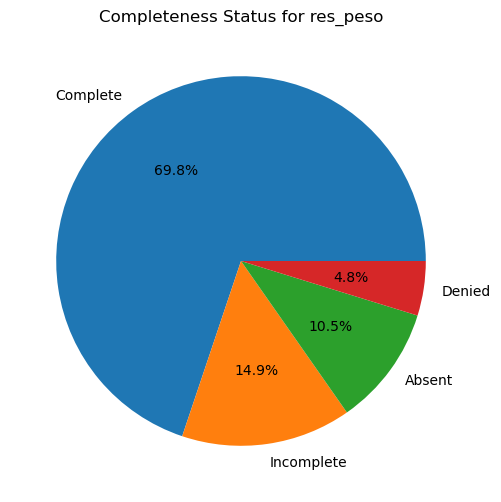

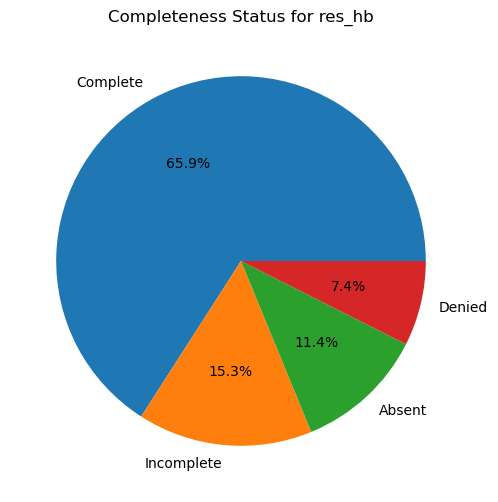

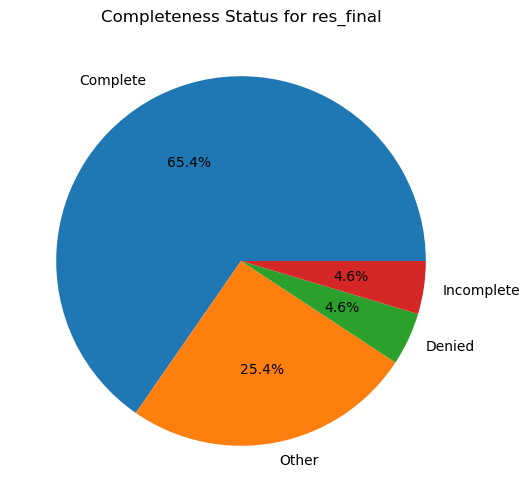

In [8]:
# Define a function to create pie charts for the RES_* columns
def create_pie_chart(column_name):
    # Get the counts of each status
    status_counts = data_001[column_name].value_counts()
    
    # Define the status labels
    status_labels = {
        1: 'Complete',
        2: 'Incomplete',
        3: 'Denied',
        4: 'Absent',
        5: 'Interview not started',
        6: 'Other'
    }
    
    # Get the labels for the present statuses
    present_labels = [status_labels[code] for code in status_counts.index]
    
    # Create the pie chart
    plt.figure(figsize=(10, 6))
    plt.pie(status_counts, labels=present_labels, autopct='%1.1f%%')
    plt.title(f'Completeness Status for {column_name}')
    plt.show()

# Create pie charts for RES_PESO, RES_HB, and RES_FINAL
create_pie_chart('res_peso')
create_pie_chart('res_hb')
create_pie_chart('res_final')


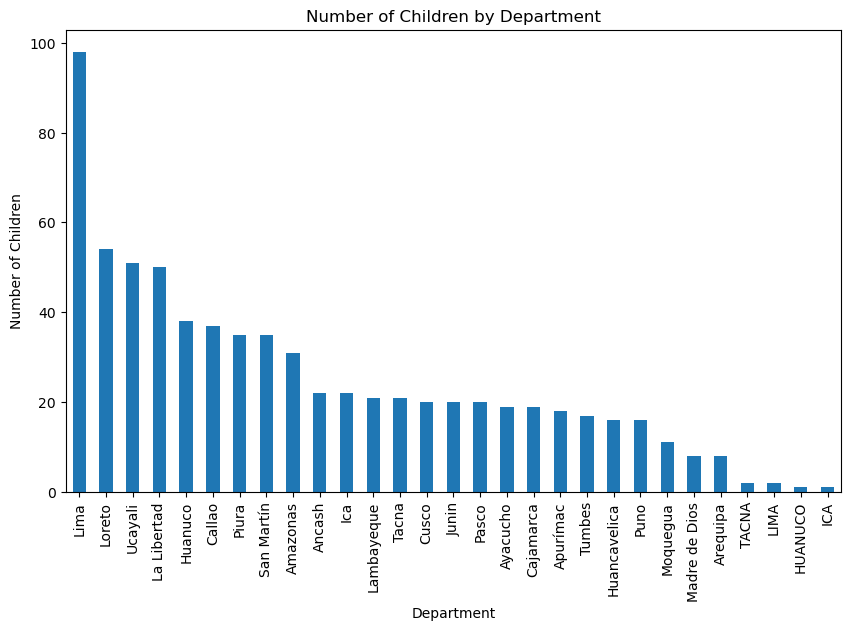

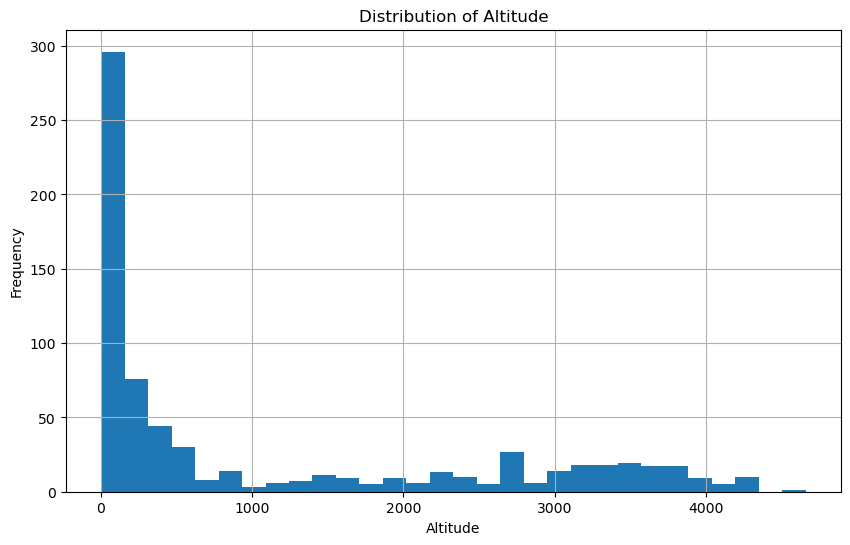

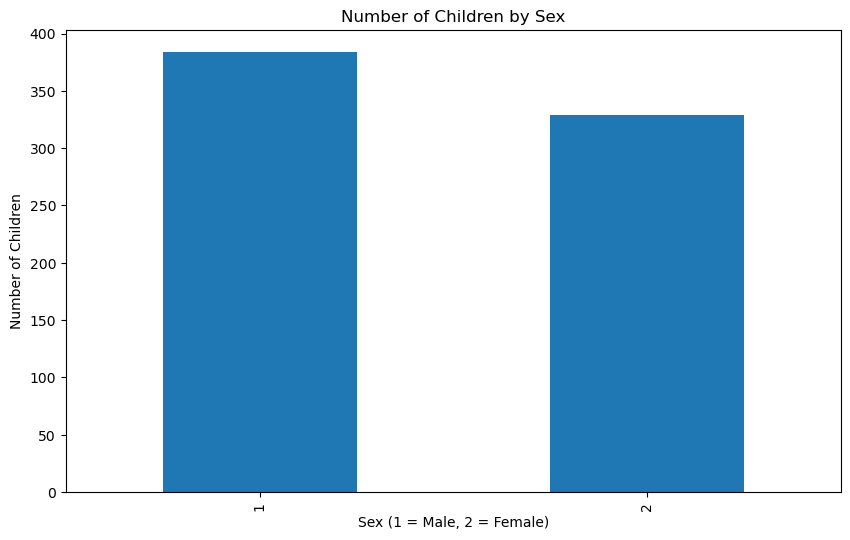

In [9]:
# Bar plot of the number of children by DEPARTAMENTO
plt.figure(figsize=(10, 6))
data_001['departamento'].value_counts().plot(kind='bar')
plt.title('Number of Children by Department')
plt.xlabel('Department')
plt.ylabel('Number of Children')
plt.show()

# Histogram of ALTITUD
plt.figure(figsize=(10, 6))
data_001['altitud'].hist(bins=30)
plt.title('Distribution of Altitude')
plt.xlabel('Altitude')
plt.ylabel('Frequency')
plt.show()

# Bar plot of the number of children by SEXO
plt.figure(figsize=(10, 6))
data_001['sexo'].value_counts().plot(kind='bar')
plt.title('Number of Children by Sex')
plt.xlabel('Sex (1 = Male, 2 = Female)')
plt.ylabel('Number of Children')
plt.show()


## Factor

In [13]:
query2 = 'select conglome, vivienda, id, dominio, departamento, provincia, distrito  from schema_nutri.factor_zona'

In [14]:
data_factor = pd.read_sql_query(query2, conn)

/var/folders/3b/5gkpc52946524dtx1sc5jtfc0000gn/T/ipykernel_16236/223541683.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_factor = pd.read_sql_query(query2, conn)


In [15]:
data_factor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   conglome      461 non-null    int64 
 1   vivienda      461 non-null    int64 
 2   id            461 non-null    object
 3   dominio       461 non-null    object
 4   departamento  461 non-null    object
 5   provincia     461 non-null    object
 6   distrito      461 non-null    object
dtypes: int64(2), object(5)
memory usage: 25.3+ KB


In [159]:
# Merge the two dataframes on CONGLOME, VIVIENDA, and ID
merged_data = pd.merge(data_001, data_factor, on=['conglome', 'vivienda', 'id'])

# Check the first few rows of the merged dataframe
merged_data.head()


,conglome,vivienda,id,altitud,sexo,departamento_x,provincia_x,distrito_x,res_peso,res_talla,res_hb,res_final,dominio,departamento_y,provincia_y,distrito_y
0,5345,4,3.0,2581,2,Apurímac,ABANCAY,TAMBURCO,1,1,1,1,Resto urbano,APURÍMAC,ABANCAY,TAMBURCO
1,5351,1,6.0,2378,2,Apurímac,ABANCAY,ABANCAY,1,1,1,1,Resto urbano,APURÍMAC,ABANCAY,ABANCAY
2,5384,6,7.0,3075,1,Apurímac,CHINCHEROS,HUACCANA,1,1,1,1,Rural,APURÍMAC,CHINCHEROS,HUACCANA
3,6028,7,3.0,21,2,Callao,CALLAO,VENTANILLA,1,1,1,1,Lima metropolitana,CALLAO,PROV. CONST. DEL CALLAO,VENTANILLA
4,6064,1,4.0,21,1,Callao,CALLAO,VENTANILLA,1,1,1,1,Lima metropolitana,CALLAO,PROV. CONST. DEL CALLAO,VENTANILLA


In [98]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461 entries, 0 to 460
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   conglome        461 non-null    int64 
 1   vivienda        461 non-null    int64 
 2   id              461 non-null    int64 
 3   altitud         461 non-null    int64 
 4   sexo            461 non-null    object
 5   departamento_x  461 non-null    object
 6   provincia_x     461 non-null    object
 7   distrito_x      461 non-null    object
 8   res_peso        461 non-null    int64 
 9   res_talla       461 non-null    int64 
 10  res_hb          461 non-null    int64 
 11  res_final       461 non-null    int64 
 12  dominio         461 non-null    object
 13  Area_Type       461 non-null    object
 14  pais            461 non-null    object
 15  index_          461 non-null    object
dtypes: int64(8), object(8)
memory usage: 61.2+ KB


In [160]:
columnas_a_eliminar = ['departamento_y', 'provincia_y', 'distrito_y']
merged_data= merged_data.drop(columnas_a_eliminar, axis=1)

In [68]:
merged_data['pais'] = 'Peru'

In [73]:
merged_data['id'] = merged_data['id'].astype(float)

In [74]:
merged_data['id'] = merged_data['id'].astype(int)

In [75]:
merged_data['index_'] = merged_data['conglome'].astype(str) + '_' + merged_data['vivienda'].astype(str) + '_' + merged_data['id'].astype(str)




In [30]:
# Define a function to classify each row as 'Urbano' or 'Rural'
def classify_area_type(row):
    if 'urbano' in row or 'Lima metropolitana' in row:
        return 'Urbano'
    else:
        return 'Rural'

# Apply the function to the 'DOMINIO' column
merged_data['Area_Type'] = merged_data['dominio'].apply(classify_area_type)


In [76]:
merged_data.value_counts('index_')

index_
10012_63_7     1
8311_102_9     1
8307_39_99     1
8307_39_6      1
8307_114_7     1
              ..
6569_127_99    1
6546_36_6      1
6546_23_5      1
6507_44_3      1
9827_29_5      1
Length: 461, dtype: int64

In [34]:
#Create the table of conglomerates

# Get the number of evaluated children in each conglomerate
num_evaluated = merged_data['Area_Type'].value_counts()

# Get the number of children in urban and rural areas
num_urban = num_evaluated.loc[num_evaluated.index.str.contains('Urbano')].sum() 
num_rural = num_evaluated.loc[num_evaluated.index.str.contains('Rural')].sum()

# Get the total number of children
num_total = num_evaluated.sum()

# Create the table
conglomerate_table = pd.DataFrame({
    'Urban': num_urban,
    'Rural': num_rural,
    'Total': num_total
}, index=['Number of Evaluated Children'])

conglomerate_table


,Urban,Rural,Total
Number of Evaluated Children,249,212,461


In [18]:
merged_data.departamento_x.value_counts()

Lima             61
Loreto           42
La Libertad      35
Ucayali          31
San Martín       29
Piura            24
Huanuco          23
Callao           23
Amazonas         21
Ica              18
Lambayeque       16
Cusco            14
Ayacucho         13
Ancash           13
Junin            12
Tacna            11
Huancavelica     11
Apurímac         11
Cajamarca        10
Pasco            10
Tumbes            8
Arequipa          7
Puno              7
Moquegua          5
Madre de Dios     4
HUANUCO           1
ICA               1
Name: departamento_x, dtype: int64

- Quitar el y.

In [19]:
merged_data.departamento_x = merged_data.departamento_x.str.capitalize()

In [20]:
merged_data.departamento_x.value_counts()

Lima             61
Loreto           42
La libertad      35
Ucayali          31
San martín       29
Huanuco          24
Piura            24
Callao           23
Amazonas         21
Ica              19
Lambayeque       16
Cusco            14
Ancash           13
Ayacucho         13
Junin            12
Apurímac         11
Huancavelica     11
Tacna            11
Cajamarca        10
Pasco            10
Tumbes            8
Arequipa          7
Puno              7
Moquegua          5
Madre de dios     4
Name: departamento_x, dtype: int64

In [38]:
merged_data.provincia_x.value_counts()

LIMA                      47
CALLAO                    25
MAYNAS                    22
TRUJILLO                  16
PADRE ABAD                13
                          ..
DANIEL ALCIDES CARRION     1
PAITA                      1
PUNO                       1
PICOTA                     1
CONTRALMIRANTE VILLAR      1
Name: provincia_x, Length: 111, dtype: int64

In [39]:
merged_data.distrito_x.value_counts()

VENTANILLA                14
SAN JUAN DE LURIGANCHO    10
CALLERIA                   8
COMAS                      7
RIO SANTIAGO               7
                          ..
FLORENCIA DE MORA          1
HUANCAYO                   1
EL CARMEN                  1
MARCONA                    1
PACHIZA                    1
Name: distrito_x, Length: 222, dtype: int64

<Figure size 1400x800 with 0 Axes>

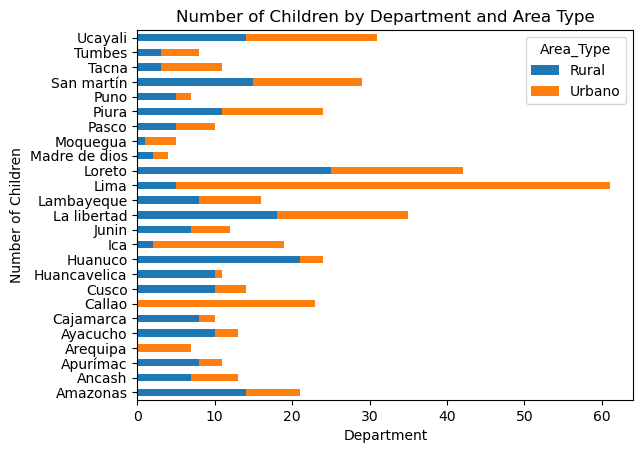

In [37]:
# Bar plot of the number of children by DEPARTAMENTO split by DOMINIO
plt.figure(figsize=(14, 8))
merged_data.groupby(['departamento_x', 'Area_Type']).size().unstack().plot(kind='barh', stacked=True)
plt.title('Number of Children by Department and Area Type')
plt.xlabel('Department')
plt.ylabel('Number of Children')
plt.show()


### Observaciones

- La mezcla de merged data es 001 y factor

- No Habian nas

- 461 es el numero de filas de factor que se tuvo en comun con factor (hay data perdida sin factor de los datos generales)

- Los cambios fueron en uniformizacion de departamento (capitalize)

- Tambien se junto urbano con lima metropolitana en domia con 'Area Type'

- El csv pero esos graficos previos estan listos.

In [81]:
merged_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 461 entries, 0 to 460
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   conglome        461 non-null    int64 
 1   vivienda        461 non-null    int64 
 2   id              461 non-null    int64 
 3   altitud         461 non-null    int64 
 4   sexo            461 non-null    object
 5   departamento_x  461 non-null    object
 6   provincia_x     461 non-null    object
 7   distrito_x      461 non-null    object
 8   res_peso        461 non-null    int64 
 9   res_talla       461 non-null    int64 
 10  res_hb          461 non-null    int64 
 11  res_final       461 non-null    int64 
 12  dominio         461 non-null    object
 13  Area_Type       461 non-null    object
 14  pais            461 non-null    object
 15  index_          461 non-null    object
dtypes: int64(8), object(8)
memory usage: 61.2+ KB


In [80]:
merged_data.sexo = merged_data.sexo.replace({1: 'Masculino', 2: 'Femenino'})

In [83]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461 entries, 0 to 460
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   conglome        461 non-null    int64 
 1   vivienda        461 non-null    int64 
 2   id              461 non-null    int64 
 3   altitud         461 non-null    int64 
 4   sexo            461 non-null    object
 5   departamento_x  461 non-null    object
 6   provincia_x     461 non-null    object
 7   distrito_x      461 non-null    object
 8   res_peso        461 non-null    int64 
 9   res_talla       461 non-null    int64 
 10  res_hb          461 non-null    int64 
 11  res_final       461 non-null    int64 
 12  dominio         461 non-null    object
 13  Area_Type       461 non-null    object
 14  pais            461 non-null    object
 15  index_          461 non-null    object
dtypes: int64(8), object(8)
memory usage: 61.2+ KB


In [82]:
merged_data.to_csv('csv_tableau/data_mergerd_gen_factor.csv', index=False)

## CAP 300 A ANEMIAY 300 SUPLEMENTOS


In [42]:
query3 = 'select conglome, vivienda, id, P314_CONSUME_SUPL  from schema_nutri.suplementos_300'

In [43]:
data_suplementos = pd.read_sql_query(query3, conn)

/var/folders/3b/5gkpc52946524dtx1sc5jtfc0000gn/T/ipykernel_16236/2668608282.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_suplementos = pd.read_sql_query(query3, conn)


In [47]:
data_suplementos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   conglome           274 non-null    int64 
 1   vivienda           274 non-null    int64 
 2   id                 274 non-null    object
 3   p314_consume_supl  274 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 8.7+ KB


In [44]:
query4 = 'select conglome, vivienda, id, P307 from schema_nutri.anemia_300'

In [46]:
data_anemia = pd.read_sql_query(query4, conn)

/var/folders/3b/5gkpc52946524dtx1sc5jtfc0000gn/T/ipykernel_16236/584411509.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_anemia = pd.read_sql_query(query4, conn)


In [48]:
data_anemia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   conglome  495 non-null    int64 
 1   vivienda  495 non-null    int64 
 2   id        495 non-null    object
 3   p307      495 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.6+ KB


In [51]:
# Merge the supplement and anemia dataframes on CONGLOME, VIVIENDA, and ID
merged_supplements_anemia = pd.merge(data_suplementos, data_anemia, on=['conglome', 'vivienda', 'id'])

# Display the first few rows of the merged dataframe
merged_supplements_anemia.head()


,conglome,vivienda,id,p314_consume_supl,p307
0,8330,15,3.0,2,1
1,8793,47,5.0,2,1
2,6581,82,99.0,2,2
3,8729,67,6.0,2,1
4,6266,86,4.0,2,1


In [52]:
# Merge the supplement and anemia data with the new merged dataset
merged_data_final = pd.merge(merged_data, merged_supplements_anemia, left_on=['conglome', 'vivienda', 'id'], right_on=['conglome', 'vivienda', 'id'])

# Display the first few rows of the final merged dataframe
merged_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257 entries, 0 to 256
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   conglome           257 non-null    int64 
 1   vivienda           257 non-null    int64 
 2   id                 257 non-null    object
 3   altitud            257 non-null    int64 
 4   sexo               257 non-null    int64 
 5   departamento_x     257 non-null    object
 6   provincia_x        257 non-null    object
 7   distrito_x         257 non-null    object
 8   res_peso           257 non-null    int64 
 9   res_talla          257 non-null    int64 
 10  res_hb             257 non-null    int64 
 11  res_final          257 non-null    int64 
 12  dominio            257 non-null    object
 13  departamento_y     257 non-null    object
 14  provincia_y        257 non-null    object
 15  distrito_y         257 non-null    object
 16  Area_Type          257 non-null    object
 1

In [57]:
# Due to the large number of departments, let's only include the top 10 departments with the most children for the next plot
top_departments = merged_data_final['departamento_x'].value_counts().index[:25]

# Filter the dataframe to only include children from the top departments
filtered_data = merged_data_final[merged_data_final['departamento_x'].isin(top_departments)]


In [58]:
department_counts = filtered_data.groupby(['p307', 'departamento_x']).size()
department_counts_group = department_counts.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))


/var/folders/3b/5gkpc52946524dtx1sc5jtfc0000gn/T/ipykernel_16236/3898526839.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  department_counts_group = department_counts.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))


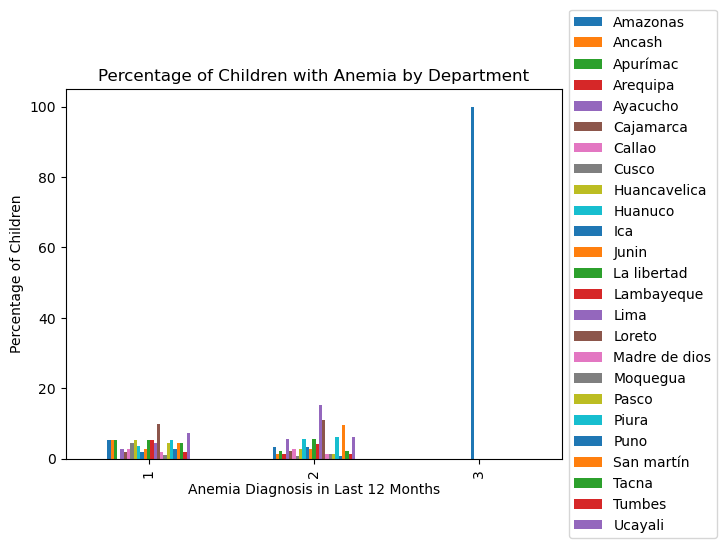

In [62]:
# Department

department_counts_group.unstack().plot(kind='bar')
plt.title('Percentage of Children with Anemia by Department')
plt.xlabel('Anemia Diagnosis in Last 12 Months')
plt.ylabel('Percentage of Children')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

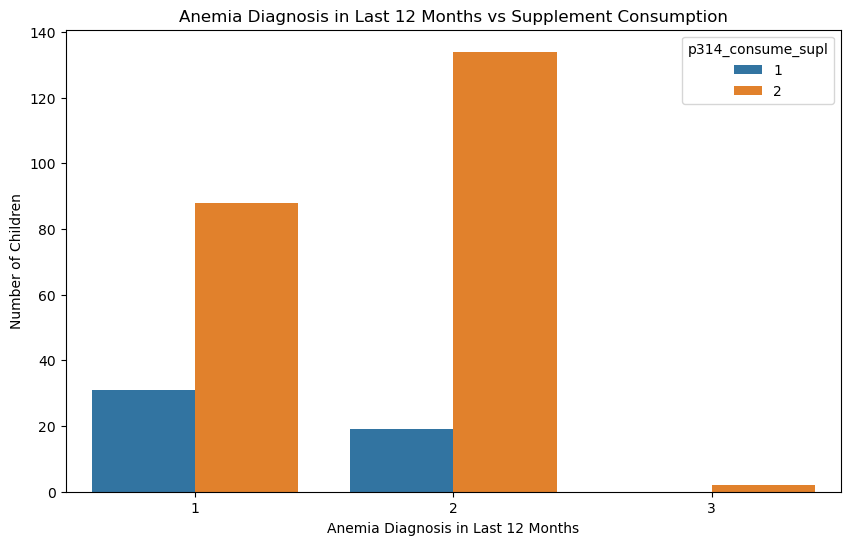

In [65]:
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_supplements_anemia, x='p307', hue='P314_CONSUME_SUPL'.lower())
plt.title('Anemia Diagnosis in Last 12 Months vs Supplement Consumption')
plt.xlabel('Anemia Diagnosis in Last 12 Months')
plt.ylabel('Number of Children')
plt.show()

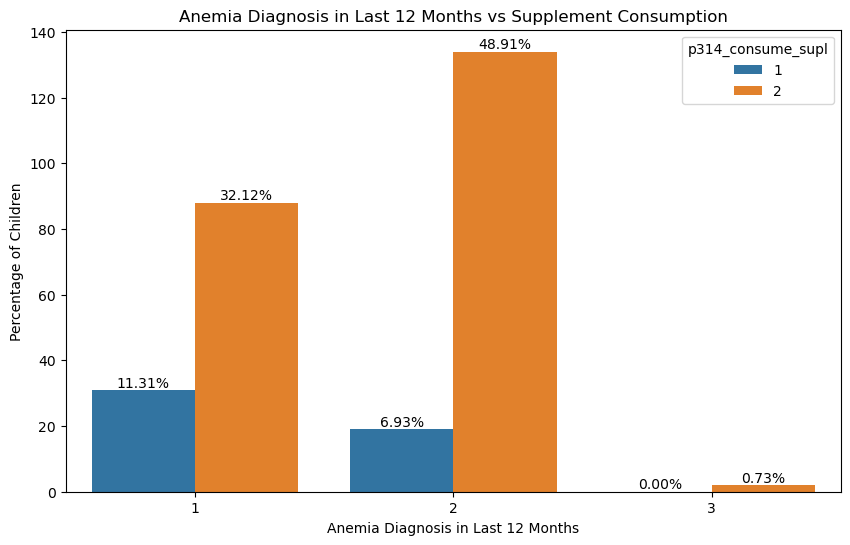

In [66]:
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=merged_supplements_anemia, x='p307', hue='P314_CONSUME_SUPL'.lower())

# Calcular los porcentajes
total = len(merged_supplements_anemia)  # Total de observaciones
for p in ax.patches:
    height = p.get_height()
    percentage = f'{(height / total) * 100:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

plt.title('Anemia Diagnosis in Last 12 Months vs Supplement Consumption')
plt.xlabel('Anemia Diagnosis in Last 12 Months')
plt.ylabel('Percentage of Children')

plt.show()


## Controles y BMI, sexo, pecho

### data integration

In [84]:
query_control = 'select * from schema_nutri.cred_peso_talla'

In [85]:
data_control = pd.read_sql_query(query_control, conn)

/var/folders/3b/5gkpc52946524dtx1sc5jtfc0000gn/T/ipykernel_16236/1259233299.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_control = pd.read_sql_query(query_control, conn)


In [88]:
data_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   conglome       495 non-null    int64  
 1   vivienda       495 non-null    int64  
 2   id             495 non-null    object 
 3   p325_peso_nac  340 non-null    float64
 4   p327_peso_00   197 non-null    float64
 5   p327_talla_00  196 non-null    float64
 6   p327_peso_01   305 non-null    float64
 7   p327_talla_01  305 non-null    float64
 8   p327_peso_02   359 non-null    float64
 9   p327_talla_02  359 non-null    float64
 10  p327_peso_03   334 non-null    float64
 11  p327_talla_03  334 non-null    float64
 12  p327_peso_04   337 non-null    float64
 13  p327_talla_04  337 non-null    float64
 14  p327_peso_05   302 non-null    float64
 15  p327_talla_05  302 non-null    float64
 16  p327_peso_06   319 non-null    float64
 17  p327_talla_06  319 non-null    float64
 18  p327_peso_

<Axes: ylabel='p327_peso_00'>

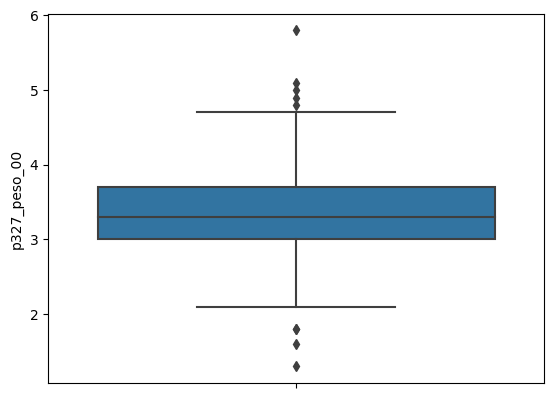

In [96]:
sns.boxplot(y=data_control['p327_peso_00' ])

In [97]:
data_control.p327_peso_00.describe()

count    197.000000
mean       3.378173
std        0.602614
min        1.300000
25%        3.000000
50%        3.300000
75%        3.700000
max        5.800000
Name: p327_peso_00, dtype: float64

In [86]:
query_alimentacion = 'select * from schema_nutri.alimentacion_300'

In [87]:
data_alimentacion = pd.read_sql_query(query_alimentacion, conn)

/var/folders/3b/5gkpc52946524dtx1sc5jtfc0000gn/T/ipykernel_16236/1517880279.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_alimentacion = pd.read_sql_query(query_alimentacion, conn)


In [89]:
data_alimentacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   conglome             495 non-null    int64  
 1   vivienda             495 non-null    int64  
 2   id                   495 non-null    object 
 3   p367                 495 non-null    int64  
 4   p368_tiempo          489 non-null    float64
 5   p368_horas           214 non-null    float64
 6   p368_dias            48 non-null     float64
 7   p369                 491 non-null    float64
 8   p370_meses           237 non-null    float64
 9   p370_ns              0 non-null      object 
 10  p371                 495 non-null    int64  
 11  p371_agua            495 non-null    int64  
 12  p371_formula         495 non-null    int64  
 13  p371_leche_envasada  495 non-null    int64  
 14  p371_leche_vaca      495 non-null    int64  
 15  p371_jugo            495 non-null    int

In [156]:
merged_data_scatter = pd.merge(data_alimentacion, data_control, on=['conglome', 'vivienda', 'id'], suffixes=('_alim', '_cred'))

In [101]:
merged_data_scatter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 0 to 494
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   conglome             495 non-null    int64  
 1   vivienda             495 non-null    int64  
 2   id                   495 non-null    object 
 3   p367                 495 non-null    int64  
 4   p368_tiempo          489 non-null    float64
 5   p368_horas           214 non-null    float64
 6   p368_dias            48 non-null     float64
 7   p369                 491 non-null    float64
 8   p370_meses           237 non-null    float64
 9   p370_ns              0 non-null      object 
 10  p371                 495 non-null    int64  
 11  p371_agua            495 non-null    int64  
 12  p371_formula         495 non-null    int64  
 13  p371_leche_envasada  495 non-null    int64  
 14  p371_leche_vaca      495 non-null    int64  
 15  p371_jugo            495 non-null    int

In [162]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461 entries, 0 to 460
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   conglome        461 non-null    int64 
 1   vivienda        461 non-null    int64 
 2   id              461 non-null    object
 3   altitud         461 non-null    int64 
 4   sexo            461 non-null    int64 
 5   departamento_x  461 non-null    object
 6   provincia_x     461 non-null    object
 7   distrito_x      461 non-null    object
 8   res_peso        461 non-null    int64 
 9   res_talla       461 non-null    int64 
 10  res_hb          461 non-null    int64 
 11  res_final       461 non-null    int64 
 12  dominio         461 non-null    object
dtypes: int64(8), object(5)
memory usage: 50.4+ KB


In [163]:
merged_data_scatter = pd.merge(merged_data_scatter, merged_data, on=['conglome', 'vivienda', 'id'])

### data cleaning 1

In [164]:
merged_data_scatter['index_'] = merged_data_scatter['conglome'].astype(str) + '_' + merged_data_scatter['vivienda'].astype(str) + '_' + merged_data_scatter['id'].astype(float).astype(int).astype(str)
# identificador unico

In [165]:
merged_data_scatter.columns

Index(['conglome', 'vivienda', 'id', 'p367', 'p368_tiempo', 'p368_horas',
       'p368_dias', 'p369', 'p370_meses', 'p370_ns', 'p371', 'p371_agua',
       'p371_formula', 'p371_leche_envasada', 'p371_leche_vaca', 'p371_jugo',
       'p371_otro', 'p371_caldos', 'p371_ninguno', 'p325_peso_nac',
       'p327_peso_00', 'p327_talla_00', 'p327_peso_01', 'p327_talla_01',
       'p327_peso_02', 'p327_talla_02', 'p327_peso_03', 'p327_talla_03',
       'p327_peso_04', 'p327_talla_04', 'p327_peso_05', 'p327_talla_05',
       'p327_peso_06', 'p327_talla_06', 'p327_peso_07', 'p327_talla_07',
       'p327_peso_08', 'p327_talla_08', 'p327_peso_09', 'p327_talla_09',
       'p327_peso_10', 'p327_talla_10', 'p331', 'p332', 'p333', 'p334',
       'altitud', 'sexo', 'departamento_x', 'provincia_x', 'distrito_x',
       'res_peso', 'res_talla', 'res_hb', 'res_final', 'dominio', 'index_'],
      dtype='object')

In [166]:
merged_data_scatter.rename(columns={
    'p367': 'Amamantado',
    
}, inplace=True)

In [167]:
merged_data_scatter.columns

Index(['conglome', 'vivienda', 'id', 'Amamantado', 'p368_tiempo', 'p368_horas',
       'p368_dias', 'p369', 'p370_meses', 'p370_ns', 'p371', 'p371_agua',
       'p371_formula', 'p371_leche_envasada', 'p371_leche_vaca', 'p371_jugo',
       'p371_otro', 'p371_caldos', 'p371_ninguno', 'p325_peso_nac',
       'p327_peso_00', 'p327_talla_00', 'p327_peso_01', 'p327_talla_01',
       'p327_peso_02', 'p327_talla_02', 'p327_peso_03', 'p327_talla_03',
       'p327_peso_04', 'p327_talla_04', 'p327_peso_05', 'p327_talla_05',
       'p327_peso_06', 'p327_talla_06', 'p327_peso_07', 'p327_talla_07',
       'p327_peso_08', 'p327_talla_08', 'p327_peso_09', 'p327_talla_09',
       'p327_peso_10', 'p327_talla_10', 'p331', 'p332', 'p333', 'p334',
       'altitud', 'sexo', 'departamento_x', 'provincia_x', 'distrito_x',
       'res_peso', 'res_talla', 'res_hb', 'res_final', 'dominio', 'index_'],
      dtype='object')

### data cleaning 2

In [168]:
needed_columns = ['index_', 'Amamantado', 'sexo'] + [f'p327_peso_0{i}' for i in range(8)] +  [f'p327_talla_0{i}' for i in range(8)]

In [169]:
cleaned_data = merged_data_scatter[needed_columns]
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461 entries, 0 to 460
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index_         461 non-null    object 
 1   Amamantado     461 non-null    int64  
 2   sexo           461 non-null    int64  
 3   p327_peso_00   184 non-null    float64
 4   p327_peso_01   289 non-null    float64
 5   p327_peso_02   337 non-null    float64
 6   p327_peso_03   315 non-null    float64
 7   p327_peso_04   317 non-null    float64
 8   p327_peso_05   285 non-null    float64
 9   p327_peso_06   301 non-null    float64
 10  p327_peso_07   280 non-null    float64
 11  p327_talla_00  183 non-null    float64
 12  p327_talla_01  289 non-null    float64
 13  p327_talla_02  337 non-null    float64
 14  p327_talla_03  315 non-null    float64
 15  p327_talla_04  317 non-null    float64
 16  p327_talla_05  285 non-null    float64
 17  p327_talla_06  301 non-null    float64
 18  p327_talla

In [170]:

cleaned_data.index_.value_counts()

5345_4_3       1
6597_166_5     1
6581_82_99     1
6572_118_5     1
6572_114_8     1
              ..
7574_69_6      1
7567_87_6      1
7567_59_6      1
7554_90_8      1
5155_213_99    1
Name: index_, Length: 461, dtype: int64

In [171]:
cleaned_data.Amamantado.value_counts()

1    457
2      4
Name: Amamantado, dtype: int64

In [172]:
cleaned_data.Amamantado = cleaned_data.Amamantado.replace({1: 'Si', 2: 'No'})

/var/folders/3b/5gkpc52946524dtx1sc5jtfc0000gn/T/ipykernel_16236/3322057350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data.Amamantado = cleaned_data.Amamantado.replace({1: 'Si', 2: 'No'})


### data cleaning 3


In [ ]:
cleaned

In [173]:
isMV = cleaned_data.p327_peso_00.isna()
isMV



0      False
1      False
2       True
3      False
4       True
       ...  
456    False
457     True
458    False
459    False
460     True
Name: p327_peso_00, Length: 461, dtype: bool

In [174]:
from scipy.stats import ttest_ind
def diagnosticoMV_numerical(df, atributo, isMV):

  labelsDic = {True:'CON Valores Faltantes',False:'SIN Valores Faltantes'}

  #Método Visual
  labels=[]
  box_sr = pd.Series('',index = isMV.unique())
  for poss in isMV.unique():
    # Filtra a los indices que son iguales a poss
    BM = isMV == poss
    # Agrega a box_sr
    box_sr[poss] = df[BM][atributo].dropna()
    labels.append(labelsDic[poss])

  
  plt.boxplot(box_sr,vert=False)
  plt.yticks([1,2],labels)
  plt.xlabel(atributo)
  plt.show()

  #Método Estadístico
  grupoCMV = df[isMV][atributo].dropna()
  grupoSMV = df[~isMV][atributo].dropna()
  pvalue = ttest_ind(grupoCMV,grupoSMV).pvalue

  print('p-value es: {}'.format(pvalue))


  

Diagnóstico para datos faltantes en p327_peso_01:


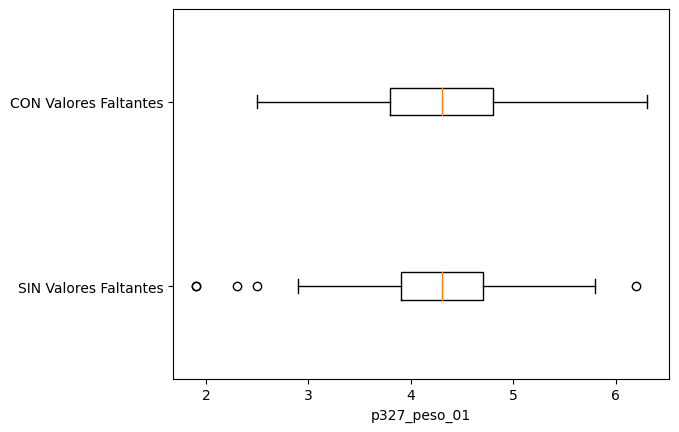

p-value es: 0.7615049013387347
- - - - - - - - - - - - - - - - - - - - - - - 
Diagnóstico para datos faltantes en p327_peso_02:


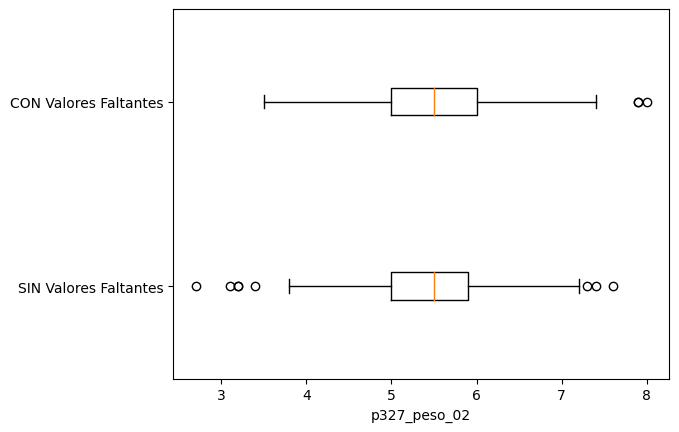

p-value es: 0.33620207887979026
- - - - - - - - - - - - - - - - - - - - - - - 
Diagnóstico para datos faltantes en p327_peso_03:


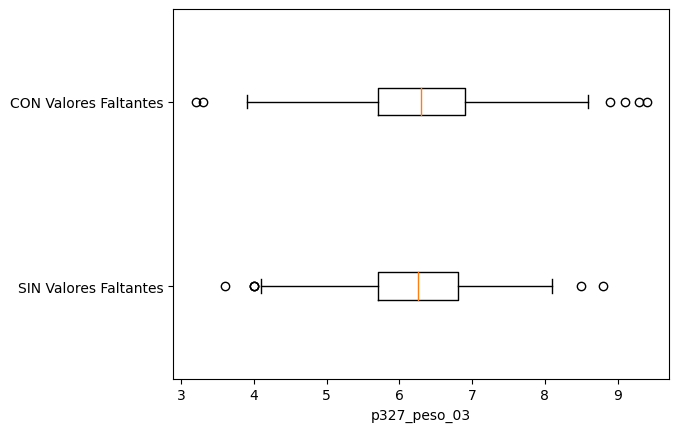

p-value es: 0.3882170311221297
- - - - - - - - - - - - - - - - - - - - - - - 
Diagnóstico para datos faltantes en p327_peso_04:


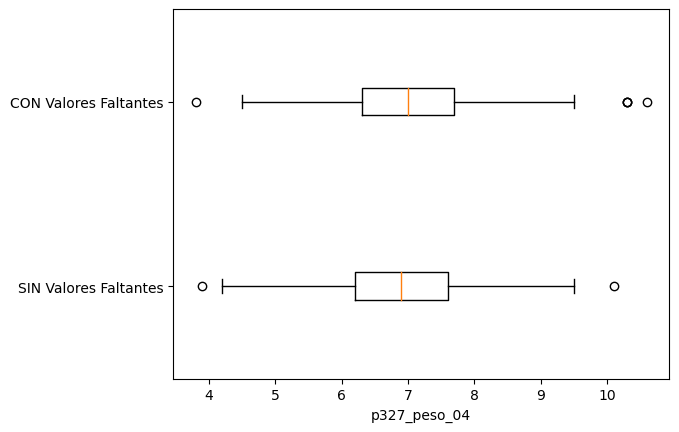

p-value es: 0.1272097634681742
- - - - - - - - - - - - - - - - - - - - - - - 
Diagnóstico para datos faltantes en p327_peso_05:


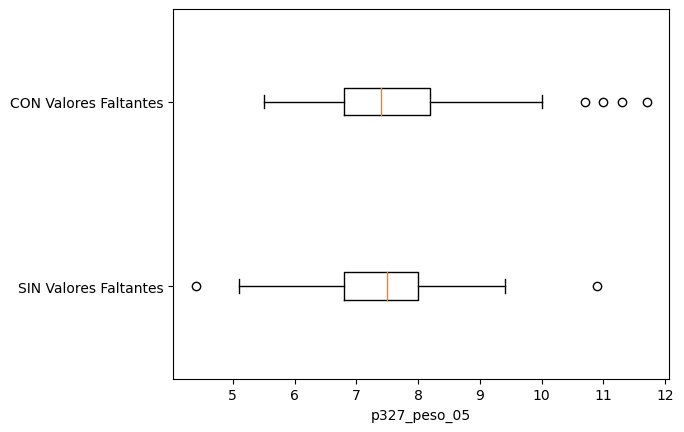

p-value es: 0.24813721347901435
- - - - - - - - - - - - - - - - - - - - - - - 
Diagnóstico para datos faltantes en p327_peso_06:


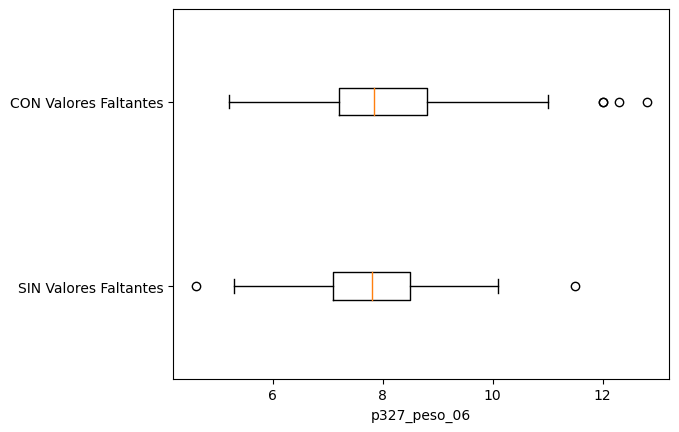

p-value es: 0.02463642583679792
- - - - - - - - - - - - - - - - - - - - - - - 
Diagnóstico para datos faltantes en p327_peso_07:


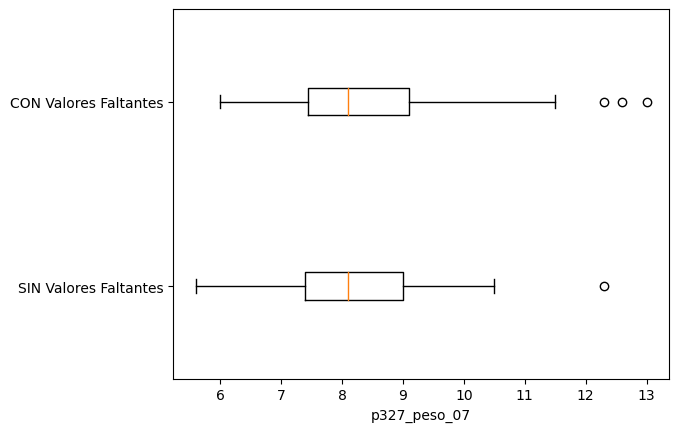

p-value es: 0.045232731291640106
- - - - - - - - - - - - - - - - - - - - - - - 
Diagnóstico para datos faltantes en p327_talla_00:


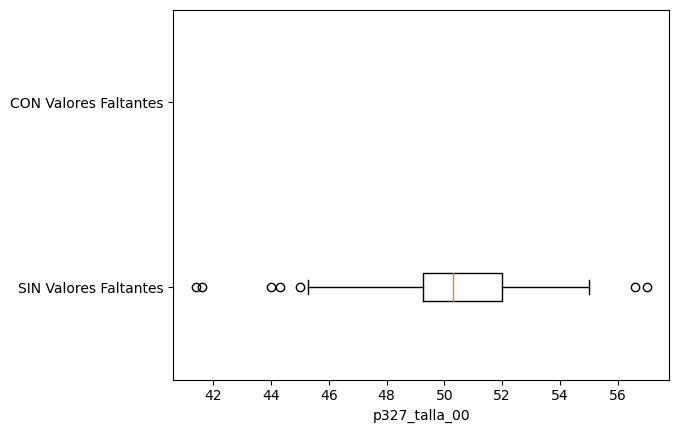

p-value es: nan
- - - - - - - - - - - - - - - - - - - - - - - 
Diagnóstico para datos faltantes en p327_talla_01:


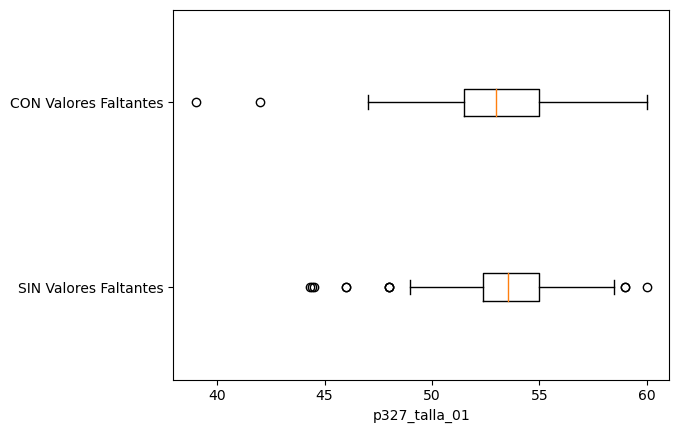

p-value es: 0.3367800727929098
- - - - - - - - - - - - - - - - - - - - - - - 
Diagnóstico para datos faltantes en p327_talla_02:


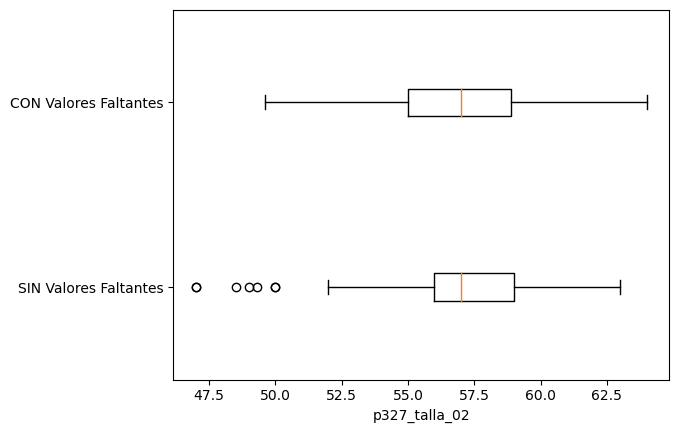

p-value es: 0.6811061248481238
- - - - - - - - - - - - - - - - - - - - - - - 
Diagnóstico para datos faltantes en p327_talla_03:


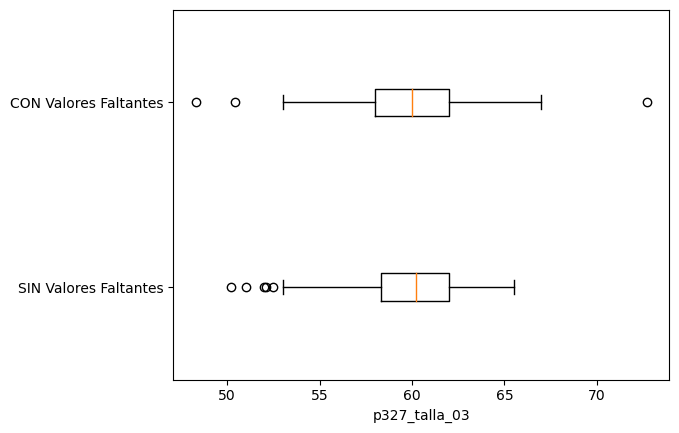

p-value es: 0.9116879771156364
- - - - - - - - - - - - - - - - - - - - - - - 
Diagnóstico para datos faltantes en p327_talla_04:


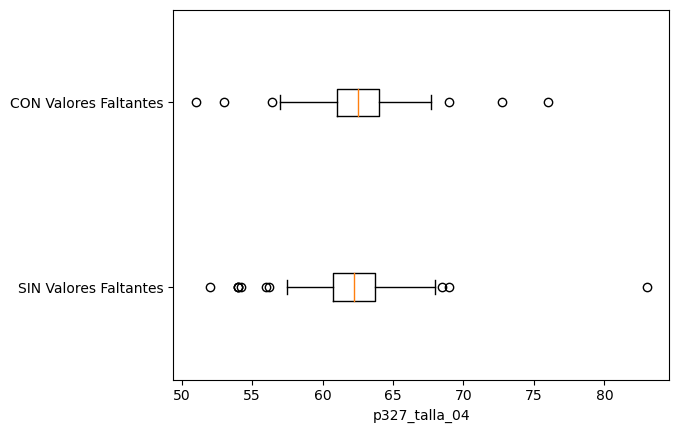

p-value es: 0.4463594018085201
- - - - - - - - - - - - - - - - - - - - - - - 
Diagnóstico para datos faltantes en p327_talla_05:


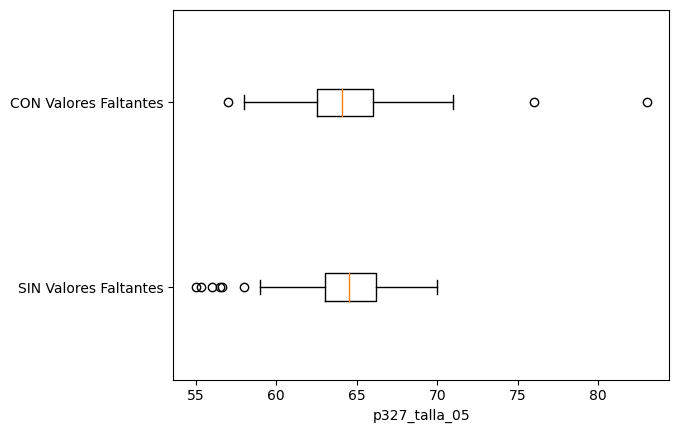

p-value es: 0.8962040508768883
- - - - - - - - - - - - - - - - - - - - - - - 
Diagnóstico para datos faltantes en p327_talla_06:


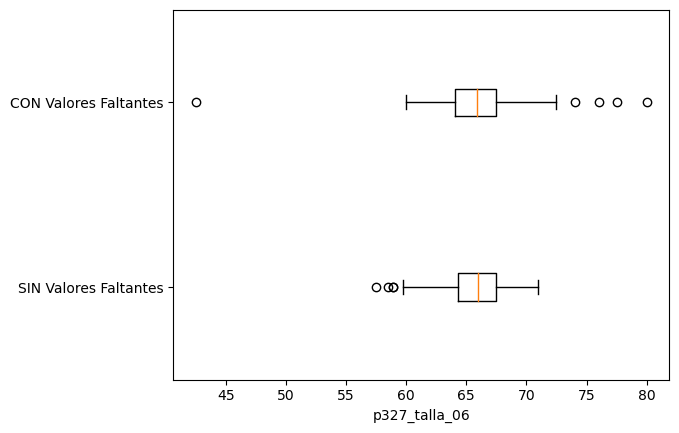

p-value es: 0.6915662464477226
- - - - - - - - - - - - - - - - - - - - - - - 
Diagnóstico para datos faltantes en p327_talla_07:


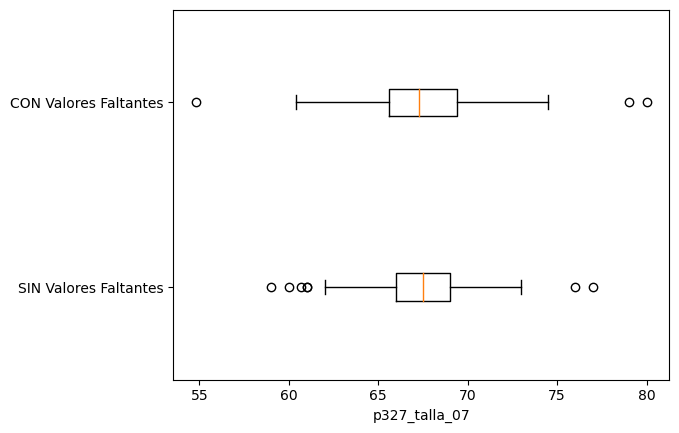

p-value es: 0.6659497955016142
- - - - - - - - - - - - - - - - - - - - - - - 


In [175]:
numAttr = [f'p327_peso_0{i}' for i in range(1,8)] +  [f'p327_talla_0{i}' for i in range(8)]

isMV = cleaned_data.p327_peso_00.isna()
for atributo in numAttr:
    print('Diagnóstico para datos faltantes en {}:'.format(atributo))
    diagnosticoMV_numerical(cleaned_data,atributo,isMV)
    print('- - - - - - - - - - - - - - - - - - - - - - - ')

**categorico**


In [150]:
from scipy.stats import chi2_contingency 
def diagnosticoMV_categorico(df, atributo, isMV):
  labelsDic = {True:'CON Valores Faltantes',False:'SIN Valores Faltantes'}
  plt.figure(figsize=(10,4))
  for i,poss in enumerate(isMV.unique()):
    plt.subplot(1,2,i+1)
    BM = isMV == poss
    df[BM][atributo].value_counts().plot.bar()
    plt.title(labelsDic[i])
  plt.show()

  contigency_table = pd.crosstab(isMV,df[atributo])
  p_value = chi2_contingency(contigency_table)[1]
    
  print('p-value of Chi_squared test: {}'.format(p_value)) 

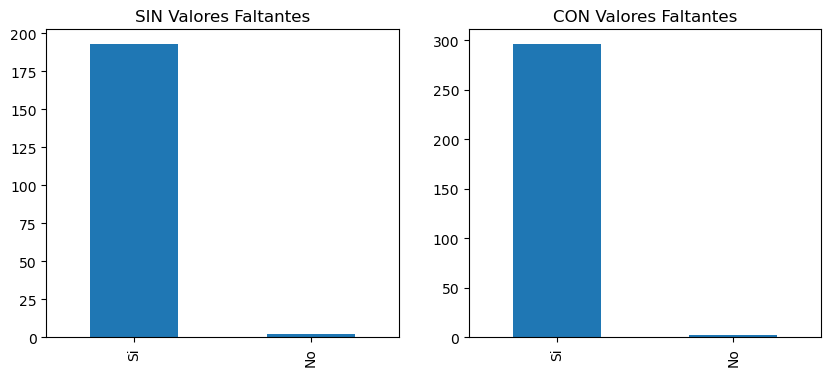

p-value of Chi_squared test: 1.0


In [151]:
diagnosticoMV_categorico(cleaned_data, "Amamantado", isMV)

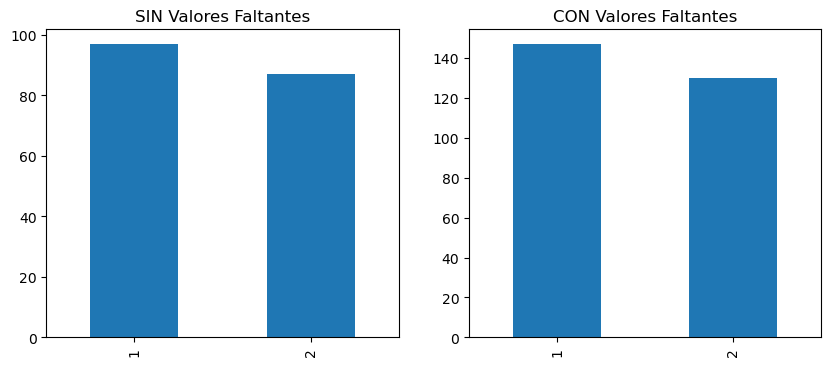

p-value of Chi_squared test: 1.0


In [176]:
diagnosticoMV_categorico(cleaned_data, "sexo", isMV)

- Todos los controles tienen el mismo numero de tallas y pesos.

Diagnostico: MCAR

In [177]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461 entries, 0 to 460
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index_         461 non-null    object 
 1   Amamantado     461 non-null    object 
 2   sexo           461 non-null    int64  
 3   p327_peso_00   184 non-null    float64
 4   p327_peso_01   289 non-null    float64
 5   p327_peso_02   337 non-null    float64
 6   p327_peso_03   315 non-null    float64
 7   p327_peso_04   317 non-null    float64
 8   p327_peso_05   285 non-null    float64
 9   p327_peso_06   301 non-null    float64
 10  p327_peso_07   280 non-null    float64
 11  p327_talla_00  183 non-null    float64
 12  p327_talla_01  289 non-null    float64
 13  p327_talla_02  337 non-null    float64
 14  p327_talla_03  315 non-null    float64
 15  p327_talla_04  317 non-null    float64
 16  p327_talla_05  285 non-null    float64
 17  p327_talla_06  301 non-null    float64
 18  p327_talla

In [179]:
cleaned_data = cleaned_data.interpolate()


In [180]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461 entries, 0 to 460
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index_         461 non-null    object 
 1   Amamantado     461 non-null    object 
 2   sexo           461 non-null    int64  
 3   p327_peso_00   461 non-null    float64
 4   p327_peso_01   461 non-null    float64
 5   p327_peso_02   461 non-null    float64
 6   p327_peso_03   461 non-null    float64
 7   p327_peso_04   461 non-null    float64
 8   p327_peso_05   461 non-null    float64
 9   p327_peso_06   461 non-null    float64
 10  p327_peso_07   461 non-null    float64
 11  p327_talla_00  461 non-null    float64
 12  p327_talla_01  461 non-null    float64
 13  p327_talla_02  461 non-null    float64
 14  p327_talla_03  461 non-null    float64
 15  p327_talla_04  461 non-null    float64
 16  p327_talla_05  461 non-null    float64
 17  p327_talla_06  461 non-null    float64
 18  p327_talla

Se interpola pues los valores faltantes son MCAR y los outliers son dentro de los valores normales, ademas de ser medidas temporales.

**data transformation**

In [182]:
def calculate_bmi(weight, height):

    height_m = height / 100

    # Calculate BMI
    bmi = weight/ (height_m ** 2)
    return bmi

In [184]:
for i in range(8):
    weight_col = f'P327_PESO_0{i}'.lower()
    height_col = f'P327_TALLA_0{i}'.lower()
    bmi_col = f'BMI_0{i}'

    cleaned_data[bmi_col] = calculate_bmi(cleaned_data[weight_col], cleaned_data[height_col])


In [186]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461 entries, 0 to 460
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index_         461 non-null    object 
 1   Amamantado     461 non-null    object 
 2   sexo           461 non-null    int64  
 3   p327_peso_00   461 non-null    float64
 4   p327_peso_01   461 non-null    float64
 5   p327_peso_02   461 non-null    float64
 6   p327_peso_03   461 non-null    float64
 7   p327_peso_04   461 non-null    float64
 8   p327_peso_05   461 non-null    float64
 9   p327_peso_06   461 non-null    float64
 10  p327_peso_07   461 non-null    float64
 11  p327_talla_00  461 non-null    float64
 12  p327_talla_01  461 non-null    float64
 13  p327_talla_02  461 non-null    float64
 14  p327_talla_03  461 non-null    float64
 15  p327_talla_04  461 non-null    float64
 16  p327_talla_05  461 non-null    float64
 17  p327_talla_06  461 non-null    float64
 18  p327_talla

In [187]:
cleaned_data.to_csv('csv_tableau/data_scatter.csv', index=False)

In [188]:



# Create a pivot table in pandas
# This will take all the BMI columns and 'pivot' them into two new columns: 'Control' and 'BMI'
df_melted = cleaned_data.melt(id_vars=['index_', 'Amamantado', 'sexo'], 
                    value_vars=[f'BMI_{i:02d}' for i in range(8)], 
                    var_name='Control', 
                    value_name='BMI')

# Remove 'BMI_' from 'Control' values
df_melted['Control'] = df_melted['Control'].str.replace('BMI_', '')

# Convert 'Control' to numeric
df_melted['Control'] = pd.to_numeric(df_melted['Control'])



In [190]:
# Save the modified dataframe to a new CSV file
df_melted['sexo'] = df_melted['sexo'].replace({1: 'Masculino', 2: 'Femenino'})
df_melted.to_csv('csv_tableau/modified_data_scatter.csv', index=False)


##DATA 400B HEMOGLOBINA


### data integration

In [191]:
query_hem = 'select * from schema_nutri.res_sin_id_400'

In [192]:
data_hem = pd.read_sql_query(query_hem, conn)

/var/folders/3b/5gkpc52946524dtx1sc5jtfc0000gn/T/ipykernel_16236/1024913620.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_hem = pd.read_sql_query(query_hem, conn)


In [193]:
data_hem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   conglome        90 non-null     int64  
 1   vivienda        90 non-null     int64  
 2   id              90 non-null     object 
 3   p400            90 non-null     int64  
 4   p402            90 non-null     int64  
 5   p408_edad       90 non-null     int64  
 6   p408_aÑos       83 non-null     float64
 7   p408_meses      90 non-null     int64  
 8   p409            78 non-null     float64
 9   p410            89 non-null     float64
 10  p411            78 non-null     float64
 11  p412            89 non-null     float64
 12  p413            89 non-null     float64
 13  p415            80 non-null     float64
 14  p416_res_peso   90 non-null     int64  
 15  p416_res_talla  90 non-null     int64  
 16  p416_res_hb     90 non-null     int64  
dtypes: float64(7), int64(9), object(1)
me

In [195]:
data_merg_hem = pd.merge(data_hem, merged_data, on = ['conglome', 'vivienda', 'id'])

In [196]:
data_merg_hem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 0 to 72
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   conglome        73 non-null     int64  
 1   vivienda        73 non-null     int64  
 2   id              73 non-null     object 
 3   p400            73 non-null     int64  
 4   p402            73 non-null     int64  
 5   p408_edad       73 non-null     int64  
 6   p408_aÑos       67 non-null     float64
 7   p408_meses      73 non-null     int64  
 8   p409            62 non-null     float64
 9   p410            73 non-null     float64
 10  p411            62 non-null     float64
 11  p412            73 non-null     float64
 12  p413            73 non-null     float64
 13  p415            73 non-null     float64
 14  p416_res_peso   73 non-null     int64  
 15  p416_res_talla  73 non-null     int64  
 16  p416_res_hb     73 non-null     int64  
 17  altitud         73 non-null     int64

In [197]:
data_merg_hem.head(10)

,conglome,vivienda,id,p400,p402,p408_edad,p408_aÑos,p408_meses,p409,p410,...,altitud,sexo,departamento_x,provincia_x,distrito_x,res_peso,res_talla,res_hb,res_final,dominio
0,7101,7,99.0,1,2,8,0.0,8,11.10,10.96,...,34,2,La Libertad,TRUJILLO,TRUJILLO,1,1,1,1,Resto urbano
1,7333,8,99.0,1,1,11,0.0,11,NaN,9.15,...,40,1,Lambayeque,CHICLAYO,JOSE LEONARDO ORTIZ,1,1,1,1,Resto urbano
2,8317,3,99.0,1,2,18,1.0,6,8.65,8.53,...,111,2,Loreto,LORETO,NAUTA,1,1,1,1,Rural
3,8318,8,99.0,1,1,9,0.0,9,7.00,6.94,...,250,1,Loreto,MAYNAS,TORRES CAUSANA,1,1,1,1,Rural
4,8332,8,99.0,1,1,0,0.0,0,3.55,3.51,...,128,1,Loreto,MAYNAS,ALTO NANAY,1,1,1,1,Rural
5,8485,4,99.0,1,1,6,NaN,6,8.85,8.75,...,1410,1,Moquegua,MARISCAL NIETO,MOQUEGUA,1,1,1,1,Resto urbano
6,8900,7,99.0,1,2,9,0.0,9,10.60,10.50,...,17,2,Piura,SECHURA,VICE,1,1,1,1,Resto urbano
7,9248,9,99.0,1,1,8,0.0,8,7.40,7.34,...,350,1,San Martín,SAN MARTIN,LA BANDA DE SHILCAYO,1,1,1,1,Resto urbano
8,9337,9,99.0,1,1,13,1.0,1,14.30,14.04,...,670,1,Tacna,TACNA,POCOLLAY,1,1,1,1,Resto urbano
9,9719,3,99.0,1,1,1,0.0,1,5.65,5.56,...,450,1,Ucayali,ATALAYA,RAYMONDI,1,1,1,1,Resto urbano


### cleaning 1

In [198]:
data_merg_hem['index_'] = data_merg_hem['conglome'].astype(str) + '_' + merged_data['vivienda'].astype(str) + '_' + merged_data['id'].astype(float).astype(int).astype(str)


In [200]:
data_merg_hem.rename(columns={
    'p408_edad': 'edad',
    'p415': 'Hemoglobina',
}, inplace=True)

In [201]:
data_merg_hem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 0 to 72
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   conglome        73 non-null     int64  
 1   vivienda        73 non-null     int64  
 2   id              73 non-null     object 
 3   p400            73 non-null     int64  
 4   p402            73 non-null     int64  
 5   edad            73 non-null     int64  
 6   p408_aÑos       67 non-null     float64
 7   p408_meses      73 non-null     int64  
 8   p409            62 non-null     float64
 9   p410            73 non-null     float64
 10  p411            62 non-null     float64
 11  p412            73 non-null     float64
 12  p413            73 non-null     float64
 13  Hemoglobina     73 non-null     float64
 14  p416_res_peso   73 non-null     int64  
 15  p416_res_talla  73 non-null     int64  
 16  p416_res_hb     73 non-null     int64  
 17  altitud         73 non-null     int64

### data cleaning 2

In [202]:
columnas_sirven = ['index_', 'edad', 'Hemoglobina', 'sexo']
data_merg_hem = data_merg_hem[columnas_sirven]

In [203]:
data_merg_hem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 0 to 72
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index_       73 non-null     object 
 1   edad         73 non-null     int64  
 2   Hemoglobina  73 non-null     float64
 3   sexo         73 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 4.9+ KB


In [204]:
data_merg_hem.sexo.replace({1: 'Masculino', 2: 'Femenino'}, inplace=True)

### data cleaning 3

<Axes: ylabel='Hemoglobina'>

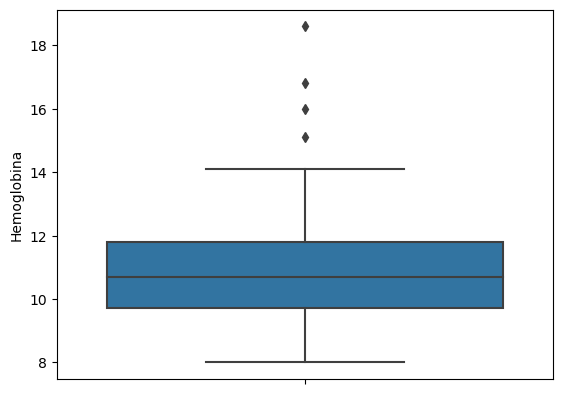

In [205]:
# no hay mvs asi que se ven outliers
sns.boxplot(y=data_merg_hem['Hemoglobina' ])